In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('https://raw.githubusercontent.com/hrcn81/commonplace/main/Datasets/pizza_v1.csv')

df = data.copy()

In [13]:
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,"235,000",22.0,chicken,double_signature,jumbo,yes,yes
1,A,"198,000",20.0,papperoni,double_signature,jumbo,yes,yes
2,A,"120,000",16.0,mushrooms,double_signature,reguler,yes,yes
3,A,"155,000",14.0,smoked beef,double_signature,reguler,yes,no
4,A,"248,000",18.0,mozzarella,double_signature,jumbo,yes,no


In [14]:
# prompt: Using dataframe df: in price_rupiah column remove Rp and comma iand last 3 zero remove

import pandas as pd
df['price_rupiah'] = df['price_rupiah'].str.replace('Rp', '')
df['price_rupiah'] = df['price_rupiah'].str.replace(',', '')
df['price_rupiah'] = df['price_rupiah'].str[:-3]
df['price_rupiah'] = df['price_rupiah'].astype(int)
df


,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,235,22.0,chicken,double_signature,jumbo,yes,yes
1,A,198,20.0,papperoni,double_signature,jumbo,yes,yes
2,A,120,16.0,mushrooms,double_signature,reguler,yes,yes
3,A,155,14.0,smoked beef,double_signature,reguler,yes,no
4,A,248,18.0,mozzarella,double_signature,jumbo,yes,no
...,...,...,...,...,...,...,...,...
124,E,39,8.5,tuna,spicy tuna,small,yes,yes
125,E,72,12.0,tuna,spicy tuna,medium,yes,yes
126,E,99,14.0,tuna,spicy tuna,large,yes,yes
127,E,44,8.5,meat,BBQ_meat_fiesta,small,yes,no


In [47]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame
encoder = LabelEncoder()
df['topping_encoded'] = encoder.fit_transform(df['topping'])

# Print the encoded values
print(df[['topping', 'topping_encoded']].drop_duplicates().sort_values(by='topping_encoded'))

         topping  topping_encoded
73          beef                0
5   black papper                1
0        chicken                2
52          meat                3
4     mozzarella                4
2      mushrooms                5
59         onion                6
1      papperoni                7
55       sausage                8
3    smoked beef                9
49          tuna               10
64    vegetables               11


In [67]:
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,price,topping_encoded
0,A,235,22.0,chicken,double_signature,jumbo,yes,yes,235,2
1,A,198,20.0,papperoni,double_signature,jumbo,yes,yes,198,7
2,A,120,16.0,mushrooms,double_signature,reguler,yes,yes,120,5
3,A,155,14.0,smoked beef,double_signature,reguler,yes,no,155,9
4,A,248,18.0,mozzarella,double_signature,jumbo,yes,no,248,4


In [49]:
df.describe()

,price_rupiah,diameter,price,topping_encoded
count,129.000000,129.000000,129.000000,129.000000
mean,87.131783,12.976744,87.131783,5.294574
std,44.716010,3.272674,44.716010,3.204984
min,23.000000,8.000000,23.000000,0.000000
25%,51.000000,12.000000,51.000000,2.000000
50%,78.000000,12.000000,78.000000,5.000000
75%,105.000000,14.000000,105.000000,9.000000
max,248.000000,22.000000,248.000000,11.000000


In [50]:
df.columns

Index(['company', 'price_rupiah', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'price', 'topping_encoded'],
      dtype='object')

In [51]:
x =0
for i in df.columns:
  x +=1
  print(x,i)

1 company
2 price_rupiah
3 diameter
4 topping
5 variant
6 size
7 extra_sauce
8 extra_cheese
9 price
10 topping_encoded


In [52]:

df.isna().sum()
# null value find kare columns ma

company            0
price_rupiah       0
diameter           0
topping            0
variant            0
size               0
extra_sauce        0
extra_cheese       0
price              0
topping_encoded    0
dtype: int64

In [53]:

df.shape

(129, 10)

In [54]:

df.describe()
# aa function min max count sum 25% etc gote

,price_rupiah,diameter,price,topping_encoded
count,129.000000,129.000000,129.000000,129.000000
mean,87.131783,12.976744,87.131783,5.294574
std,44.716010,3.272674,44.716010,3.204984
min,23.000000,8.000000,23.000000,0.000000
25%,51.000000,12.000000,51.000000,2.000000
50%,78.000000,12.000000,78.000000,5.000000
75%,105.000000,14.000000,105.000000,9.000000
max,248.000000,22.000000,248.000000,11.000000


In [55]:
df['price'] = df['price_rupiah']

In [56]:
x =0
for i in df.columns:
  x +=1
  print(x,i)

1 company
2 price_rupiah
3 diameter
4 topping
5 variant
6 size
7 extra_sauce
8 extra_cheese
9 price
10 topping_encoded


In [57]:
output_col = 'price_rupiah'

In [115]:
X = df.iloc[:,2::7]
# direct colamn na name parthi pan x ni value levase EX niche mujab
# X = df[['diameter','topping_encoded']]

In [116]:
X.head()

,diameter,topping_encoded
0,22.0,2
1,20.0,7
2,16.0,5
3,14.0,9
4,18.0,4


In [96]:
y = df.loc[:,'price']

In [97]:
y.head()

0    235
1    198
2    120
3    155
4    248
Name: price, dtype: int64

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

In [99]:
X_train.shape

(90, 2)

In [100]:
lr = LinearRegression()

In [101]:
lr.fit(X_train,y_train)

LinearRegression()

In [102]:
lr.coef_
# y=m.x+b ma m ni value aetle coef che

array([11.61481726,  1.454299  ])

In [103]:
lr.intercept_
# jo x ni value 0 hase to y ni line -71 thi chalu thase (slop)

-71.14282056929464

In [104]:

pred_value = lr.predict(X_test)

In [105]:
from sklearn.metrics import mean_squared_error

In [106]:
cost = mean_squared_error(y_test,pred_value)

In [107]:
cost

511.18984664373636

In [108]:
pred_value

array([ 84.23227552,  40.67181712, 107.46191004, 149.54849469,
       121.96575055, 106.00761104,  94.37321903,  30.49172412,
       149.54849469,  74.05218252, 149.54849469,  74.05218252,
       133.5805678 ,  79.86937852,  30.49172412,  94.37321903,
        71.14358451, 106.00761104, 171.33361757, 107.46191004,
        34.85462112,  94.37321903,  24.68431549,  71.14358451,
       187.29175708, 127.78294655, 103.09901303, 116.14855454,
        34.8644085 ,  97.28181703,  74.05218252, 129.2176708 ,
        81.32367752, 187.29175708,  75.50648152,  69.68928551,
       145.18559768,  98.73611603,  81.32367752])

In [109]:
y_test

71      72
43      75
72      99
15     140
2      120
78      92
114     72
37      33
79     140
38      46
10     140
113     46
116    119
56      72
112     33
86     114
115     76
126     99
1      198
69      84
106     31
22     114
81      70
94      96
20     230
80     110
57      99
11     110
12      70
45      72
92      49
104     83
9       90
0      235
8       90
13      90
5      140
33      93
121     49
Name: price, dtype: int64

In [110]:
resdials = y_test - pred_value

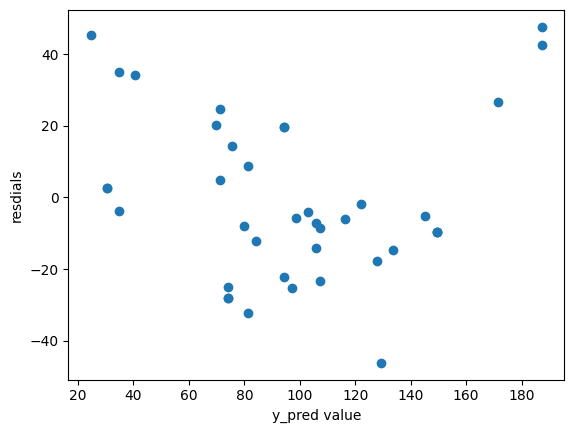

In [117]:
plt.scatter(pred_value,resdials)
plt.xlabel('y_pred value')
plt.ylabel('resdials')
plt.show()

<ipython-input-118-6c19204d0707>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resdials)


<Axes: xlabel='price', ylabel='Density'>

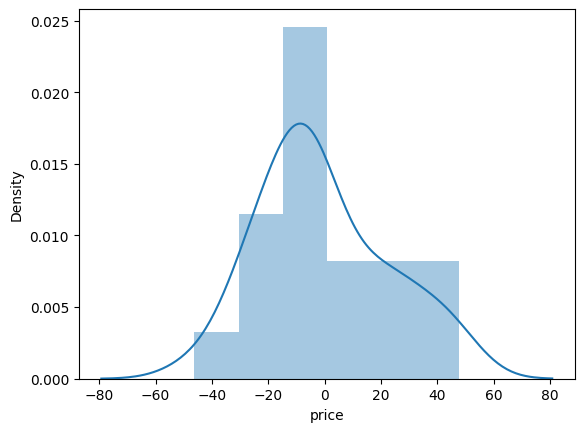

In [118]:
sns.distplot(resdials)

In [121]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MAE", mean_absolute_error(y_test,pred_value))
print("MSE", mean_squared_error(y_test,pred_value))
print("RMSE",np.sqrt(mean_squared_error(y_test,pred_value)))
print("R2 score", r2_score(y_test,pred_value))

r2 = r2_score(y_test,pred_value)

# maw mse rmse ni value 0 thi najik hovi joiye
# R2 ni value 1 ni najik hovi joiye

MAE 18.403028378796733
MSE 511.18984664373636
RMSE 22.60950788150278
R2 score 0.7628435610246354


In [123]:
df.describe()

,price_rupiah,diameter,price,topping_encoded
count,129.000000,129.000000,129.000000,129.000000
mean,87.131783,12.976744,87.131783,5.294574
std,44.716010,3.272674,44.716010,3.204984
min,23.000000,8.000000,23.000000,0.000000
25%,51.000000,12.000000,51.000000,2.000000
50%,78.000000,12.000000,78.000000,5.000000
75%,105.000000,14.000000,105.000000,9.000000
max,248.000000,22.000000,248.000000,11.000000


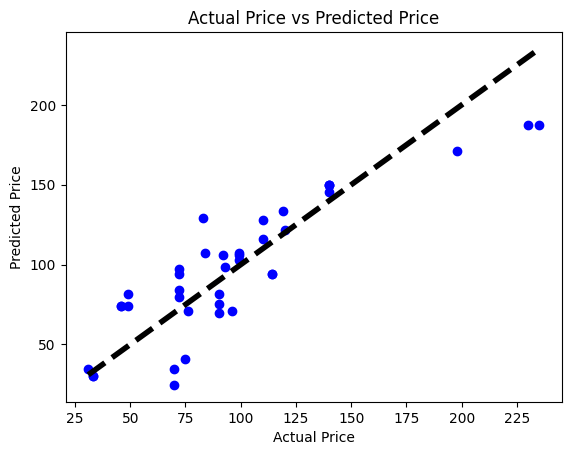

In [124]:
# Plotting actual vs predicted values
plt.scatter(y_test, pred_value, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()